                                                    Back Exercise Questions

Q1.   
What should be the input shape of the input image to the
convolutional neural network?

A. Width, Height

B. Height, Width

C. Channels, Width, Height

D. Width, Height, Channels

Ans.  (D) Width, Height and Channels

Q2.   
We say that a model is overfitting when:

A. Results on the test set are better than the results on the
training set

B. Results on both test and training sets are similar

C. Results on the training set are better than the results on
the test set

D. None of the above

Ans. (C) Results on the training set are better than the results on the test set

Q3.    
The ReLu activation function is used to introduce:

A. Linearity

B. Non-linearity

C. Quadraticity

D. None of the above

Ans. B. Non-linearity

Q4.  
Using the CFAR 10 image dataset, perform image classification
to recognize the image. Here is the dataset:

cifar_dataset = tf.keras.datasets.cifar10

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.models import Model
from keras.datasets import cifar10


In [ ]:
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
training_images, test_images =  training_images/255.0, test_images/255.0
training_images, test_images

(array([[[[0.00090734, 0.00095348, 0.00096886],
          [0.00066128, 0.00070742, 0.00069204],
          [0.00076894, 0.00073818, 0.00066128],
          ...,
          [0.00242983, 0.00202999, 0.0016609 ],
          [0.00233756, 0.00192234, 0.00156863],
          [0.00227605, 0.00190696, 0.00158401]],
 
         [[0.00024606, 0.00030757, 0.00030757],
          [0.        , 0.        , 0.        ],
          [0.00027682, 0.00012303, 0.        ],
          ...,
          [0.00189158, 0.00135333, 0.00084583],
          [0.00183007, 0.00127643, 0.00076894],
          [0.0018762 , 0.00133795, 0.00087659]],
 
         [[0.00038447, 0.00036909, 0.00032295],
          [0.00024606, 0.00010765, 0.        ],
          [0.00075356, 0.00041522, 0.00012303],
          ...,
          [0.00181469, 0.00129181, 0.00076894],
          [0.00184544, 0.00129181, 0.00076894],
          [0.00167628, 0.00112265, 0.00064591]],
 
         ...,
 
         [[0.00319877, 0.00261438, 0.00147636],
          [0.00309

In [ ]:
training_labels, test_labels = training_labels.flatten(), test_labels.flatten()
training_labels, test_labels

(array([6, 9, 9, ..., 9, 1, 1], dtype=uint8),
 array([3, 8, 8, ..., 5, 1, 7], dtype=uint8))

In [ ]:
print(training_labels.shape)
print(training_images.shape)

(50000,)
(50000, 32, 32, 3)


In [ ]:
output_classes = len(set(training_labels))
output_classes

10

In [ ]:
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [ ]:
input_layer = Input(shape = training_images[0].shape)
input_layer

<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [ ]:
conv1 =  Conv2D(32, (3,3), strides = 2, activation = 'relu')(input_layer)
conv1

<KerasTensor shape=(None, 15, 15, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [33]:
maxpool1 = MaxPool2D(2,2)(conv1)
maxpool1

<KerasTensor shape=(None, 7, 7, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_11>

In [34]:
conv2 = Conv2D(64, (3,3), strides = 2, activation = 'relu')(maxpool1)
conv2

<KerasTensor shape=(None, 3, 3, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_12>

In [39]:
#conv3 = Conv2D(128, (3,3), strides = 2, activation = 'relu')(conv2)
#conv3

In [36]:
flat1 = Flatten()(conv2)
flat1

<KerasTensor shape=(None, 576), dtype=float32, sparse=False, ragged=False, name=keras_tensor_14>

In [ ]:
drop1 = Dropout(0.2)(flat1)
drop1

<KerasTensor shape=(None, 576), dtype=float32, sparse=False, ragged=False, name=keras_tensor_7>

In [ ]:
dense1 = Dense(512, activation = 'relu')(drop1)
dense1

<KerasTensor shape=(None, 512), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>

In [ ]:
drop2 = Dropout(0.2)(dense1)
drop2

<KerasTensor shape=(None, 512), dtype=float32, sparse=False, ragged=False, name=keras_tensor_9>

In [ ]:
output_layer = Dense(output_classes, activation = 'softmax')(drop2)
output_layer

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>

In [31]:
model = Model(input_layer, output_layer)
model

<Functional name=functional_1, built=True>

In [43]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

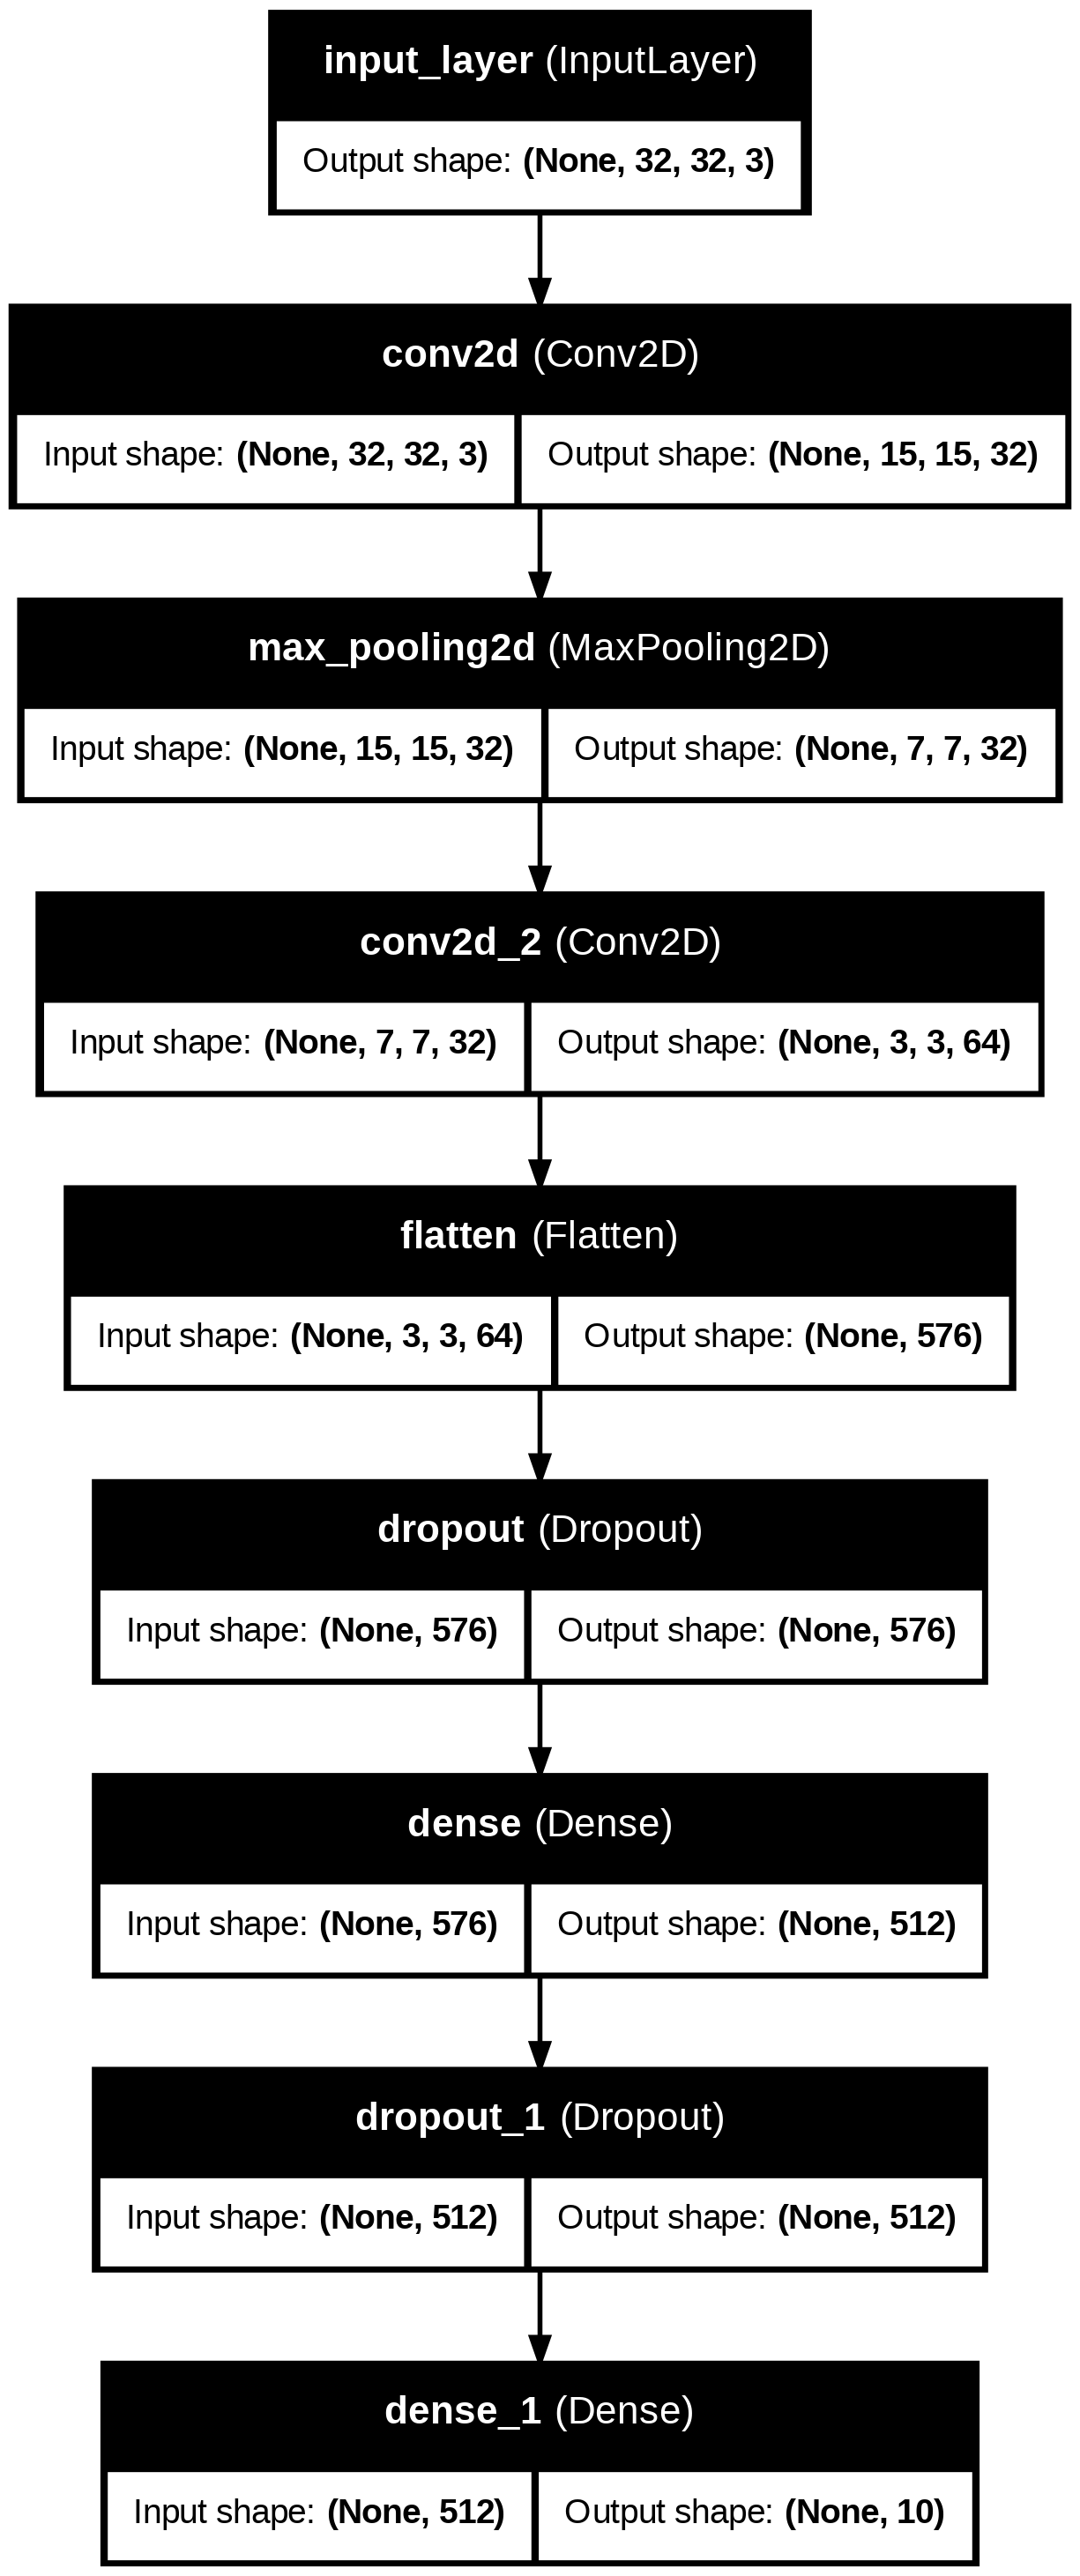

In [49]:
from keras.utils import plot_model

plot_model(model, to_file = 'model_plot1.png', show_shapes = True, show_layer_names =True )

In [44]:
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.1433 - loss: 2.2390 - val_accuracy: 0.2598 - val_loss: 2.0094
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.2634 - loss: 2.0125 - val_accuracy: 0.3056 - val_loss: 1.9346
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.2822 - loss: 1.9481 - val_accuracy: 0.3130 - val_loss: 1.8833
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2968 - loss: 1.9214 - val_accuracy: 0.3207 - val_loss: 1.8574
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3006 - loss: 1.9098 - val_accuracy: 0.3234 - val_loss: 1.8564
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.3092 - loss: 1.8869 - val_accuracy: 0.3413 - val_loss: 1.8277
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3160 - loss: 1.8731 - val_accuracy: 0.3496 - val_loss: 1.8034
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3243 -

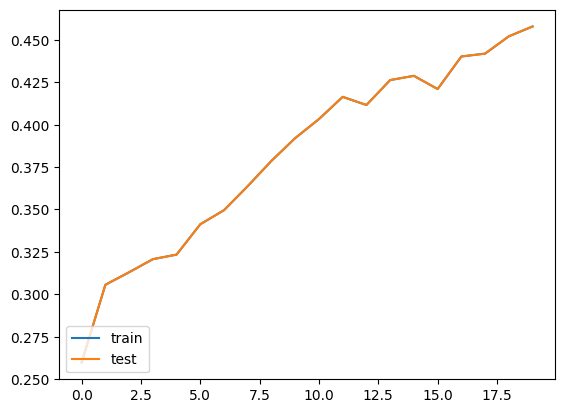

In [48]:
# ploting the accuracy table
import matplotlib.pyplot as plt

plt.plot(model_history.history['val_accuracy'], label = 'accuracy')

plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train', 'test'],loc = 'lower left')